<img src="Img/img.png" alt="FST Logo" width="1700" height="500" >
<h1 style="text-align:center;font-size:200%;;">Flying Squirrel Optimizer</h1>
<h4 style="text-align:center;">Réaliser par  :  DAGHMOUMI Marouan </h4>
<h4 style="text-align:center;">Encadré par  : Pr. JEBARI Khalid</h4>

## Définition
L'Optimiseur d'Écureuil Volant (OEV) est un algorithme d'optimisation inspiré de la nature, basé sur le comportement de glisse des écureuils volants. L'algorithme imite la façon dont les écureuils volants glissent d'un arbre à l'autre à la recherche de nourriture.

## Principe

L'algorithme OEV fonctionne en initialisant une population d'écureuils volants (solutions) puis en mettant à jour itérativement leurs positions en fonction de leur fitness et de la position de la meilleure solution trouvée jusqu'à présent.

## Étapes

### 1. Initialisation

Générer une population initiale d'écureuils volants de manière aléatoire. Chaque écureuil représente une solution potentielle au problème d'optimisation.

$\[ \mathbf{X}_i^{(0)} = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(\mathbf{X}_i^{(0)}\)$ : Position initiale du i-ème écureuil.
- $\(\mathbf{X}_{\min}\)$ : Limite inférieure de l'espace de recherche.
- $\(\mathbf{X}_{\max}\)$ : Limite supérieure de l'espace de recherche.
- $\(\mathbf{r}_i\)$ : Vecteur aléatoire uniformément distribué dans [0, 1].

### 2. Évaluation

Évaluer la fitness de chaque écureuil (solution) en utilisant la fonction objectif du problème d'optimisation.

$\[ f_i = f(\mathbf{X}_i) \]$

- $\(f_i\)$ : Fitness du i-ème écureuil.
- $\(f(\cdot)\)$ : Fonction objectif.

### 3. Mise à jour

Mettre à jour la position de chaque écureuil en fonction de sa fitness et de la position de la meilleure solution trouvée jusqu'à présent. La mise à jour est effectuée en utilisant la formule suivante :

$\[ \mathbf{X}_i^{(t+1)} = \mathbf{X}_i^{(t)} + \mathbf{v}_i^{(t)} \]$

La vélocité $\(\mathbf{v}_i^{(t)}\)$ peut être calculée en utilisant :

$\[ \mathbf{v}_i^{(t)} = \mathbf{c}_1 \mathbf{r}_1 (\mathbf{X}_{\text{meilleur}}^{(t)} - \mathbf{X}_i^{(t)}) + \mathbf{c}_2 \mathbf{r}_2 (\mathbf{X}_{\text{aléatoire}}^{(t)} - \mathbf{X}_i^{(t)}) \]$

- $\(\mathbf{X}_i^{(t+1)}\)$ : Position mise à jour du i-ème écureuil à l'itération (t+1).
- $\(\mathbf{X}_i^{(t)}\)$ : Position actuelle du i-ème écureuil à l'itération (t).
- $\(\mathbf{v}_i^{(t)}\)$ : Vélocité du i-ème écureuil à l'itération (t).
- $\(\mathbf{c}_1, \mathbf{c}_2\)$ : Coefficients d'accélération.
- $\(\mathbf{r}_1, \mathbf{r}_2\)$ : Vecteurs aléatoires uniformément distribués dans [0, 1].
- $\(\mathbf{X}_{\text{meilleur}}^{(t)}\)$ : Meilleure position trouvée jusqu'à présent à l'itération (t).
- $\(\mathbf{X}_{\text{aléatoire}}^{(t)}\)$ : Position sélectionnée aléatoirement dans la population à l'itération (t).

### 4. Sélection

Sélectionner la meilleure solution trouvée jusqu'à présent et l'utiliser pour guider la recherche dans l'itération suivante.

$\[ \mathbf{X}_{\text{meilleur}}^{(t+1)} = \arg \min_{\mathbf{X}_i} f(\mathbf{X}_i) \]$

- $\(\mathbf{X}_{\text{meilleur}}^{(t+1)}\)$ : Meilleure position à l'itération (t+1).

### 5. Terminaison

Si les critères d'arrêt sont atteints (par exemple, nombre maximum d'itérations atteint, solution suffisamment bonne), arrêter l'algorithme et renvoyer la meilleure solution trouvée. Sinon, retourner à l'étape 3.

$\[ \text{si } t \geq t_{\max} \text{ ou } f(\mathbf{X}_{\text{meilleur}}) \leq \epsilon \text{ alors arrêter} \]$

- $\(t_{\max}\)$ : Nombre maximum d'itérations.
- $\(\epsilon\)$ : Seuil de précision souhaité.

L'algorithme OEV est simple mais efficace pour résoudre un large éventail de problèmes d'optimisation. Son principal avantage réside dans sa simplicité et sa facilité de mise en œuvre.

<img src="Img/Flying.png" alt="FST Logo" width="1000" height="1500" >

# Code: Flying Squirrel Optimizer


In [1]:
# Importation de la bibliothèque numpy sous l'alias np. Cette bibliothèque est utilisée pour travailler avec des tableaux.
import numpy as np

# Importation de la bibliothèque matplotlib.pyplot sous l'alias plt. Cette bibliothèque est utilisée pour créer des visualisations statiques, animées et interactives en Python.
import matplotlib.pyplot as plt

# Importation de modules spécifiques de la bibliothèque ipywidgets. Ces modules sont utilisés pour créer des widgets interactifs dans les notebooks Jupyter.
from ipywidgets import Button, Output, VBox, HBox, HTML

# Importation de modules spécifiques de la bibliothèque IPython.display. Ces modules sont utilisés pour afficher des widgets, des images et d'autres types d'objets.
from IPython.display import display, clear_output

In [2]:
# Définition de la fonction sphere_function. Cette fonction est un exemple de fonction objectif.
# Elle calcule la somme des carrés des éléments d'un vecteur x.
def sphere_function(x):
    return np.sum(x**2)

In [3]:
# Définition de la classe FlyingSquirrelOptimizer. Cette classe représente l'algorithme d'optimisation Flying Squirrel.
class FlyingSquirrelOptimizer:
    # Initialisation de la classe avec plusieurs paramètres.
    def __init__(self, objective_function, dimensions, bounds, population_size, max_iterations):
        # La fonction objectif à optimiser.
        self.objective_function = objective_function
        # Le nombre de dimensions de l'espace de recherche.
        self.dimensions = dimensions
        # Les limites de l'espace de recherche.
        self.bounds = bounds
        # La taille de la population de solutions.
        self.population_size = population_size
        # Le nombre maximum d'itérations à effectuer.
        self.max_iterations = max_iterations

        # Probabilité de présence de prédateur.
        self.pd = 0.1  
        # Constante de glisse.
        self.gc = 0.6  

        # Définition des limites inférieure et supérieure de l'espace de recherche.
        self.lower_bound, self.upper_bound = bounds
        # Initialisation de la population de solutions de manière aléatoire.
        self.population = np.random.uniform(self.lower_bound, self.upper_bound, (population_size, dimensions))
        # Calcul de la fitness de chaque solution de la population.
        self.fitness = np.array([objective_function(ind) for ind in self.population])

        # Sélection de la meilleure solution de la population.
        self.best_index = np.argmin(self.fitness)
        self.best_solution = self.population[self.best_index]
        self.best_fitness = self.fitness[self.best_index]

        # Enregistrement de l'historique de la meilleure fitness.
        self.history = [self.best_fitness]
        # Initialisation du compteur d'itérations.
        self.current_iteration = 0

        # Création d'un graphique pour visualiser l'évolution de l'algorithme.
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.scatter = self.ax.scatter(self.population[:, 0], self.population[:, 1], c='blue', label='Population')
        self.best_point = self.ax.scatter(self.best_solution[0], self.best_solution[1], c='red', label='Best Solution')
        plt.xlim(self.lower_bound, self.upper_bound)
        plt.ylim(self.lower_bound, self.upper_bound)
        plt.title("Optimisation par l'optimiseur Flying Squirrel")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.legend()
        plt.grid(True)

    # Définition de la méthode iterate de la classe FlyingSquirrelOptimizer.
    def iterate(self):
        # Vérification si le nombre d'itérations courant est inférieur au nombre maximum d'itérations.
        if self.current_iteration < self.max_iterations:
            # Tri des indices de la population en fonction de leur fitness.
            sorted_indices = np.argsort(self.fitness)
            # Réorganisation de la population et de la fitness en fonction des indices triés.
            self.population = self.population[sorted_indices]
            self.fitness = self.fitness[sorted_indices]

            # Mise à jour de la position de chaque individu de la population.
            for i in range(1, self.population_size):
                # Si la condition est vraie, il n'y a pas de prédateur.
                if np.random.random() > self.pd:
                    r = np.random.random(self.dimensions)
                    self.population[i] = self.population[i] + self.gc * r * (self.population[0] - self.population[i])
                else:  # Si la condition est fausse, un prédateur est présent.
                    self.population[i] = np.random.uniform(self.lower_bound, self.upper_bound, self.dimensions)

            # Calcul de la fitness de chaque individu de la population.
            self.fitness = np.array([self.objective_function(ind) for ind in self.population])

            # Mise à jour de la meilleure solution si une meilleure fitness est trouvée.
            if np.min(self.fitness) < self.best_fitness:
                self.best_index = np.argmin(self.fitness)
                self.best_solution = self.population[self.best_index]
                self.best_fitness = self.fitness[self.best_index]

            # Ajout de la meilleure fitness à l'historique.
            self.history.append(self.best_fitness)

            # Mise à jour des points du graphique.
            self.scatter.set_offsets(self.population[:, :2])
            self.best_point.set_offsets(self.best_solution[:2])
            # Mise à jour du titre du graphique.
            self.ax.set_title(f"Optimisation par l'optimiseur Flying Squirrel\nItération: {self.current_iteration + 1}")

            # Incrémentation du compteur d'itérations.
            self.current_iteration += 1

            # Effacement de l'affichage précédent et affichage du graphique.
            clear_output(wait=True)
            display(self.fig)
            plt.close(self.fig)

            # Affichage de l'itération courante et de la meilleure fitness.
            print(f"Itération: {self.current_iteration}")
            print(f"Meilleure fitness actuelle: {self.best_fitness}")

            # Affichage des résultats de chaque fonction sous forme de tableau HTML.
            table_html = "<table><tr><th>Individu</th><th>Fitness</th></tr>"
            for i, fit in enumerate(self.fitness):
                table_html += f"<tr><td>{i+1}</td><td>{fit:.6f}</td></tr>"
            table_html += "</table>"
            display(HTML(table_html))
        else:
            # Si le nombre maximum d'itérations est atteint, l'optimisation est terminée.
            print("Optimisation terminée!")


In [4]:
# Définir les dimensions, les limites, la taille de la population et le nombre maximum d'itérations.
dimensions = 2
bounds = (-10, 10)
population_size = 30
max_iterations = 100

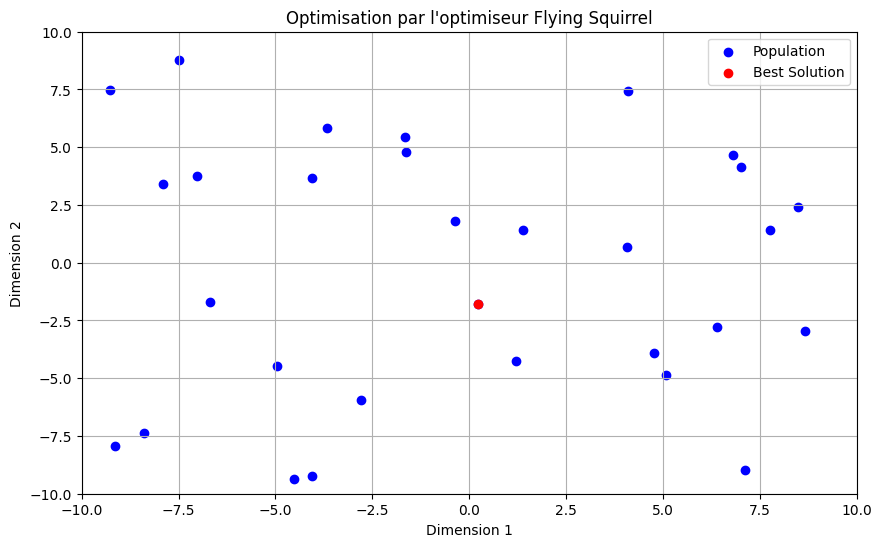

In [5]:
# Créer une instance de l'optimiseur FlyingSquirrelOptimizer.
# Nous utilisons la fonction sphere_function comme fonction objectif, et nous passons les dimensions, les limites, la taille de la population et le nombre maximum d'itérations que nous avons définis précédemment.
optimizer = FlyingSquirrelOptimizer(sphere_function, dimensions, bounds, population_size, max_iterations)

# Créer un bouton avec la description "Itération suivante".
button = Button(description="Itération suivante")
# Créer une sortie pour afficher les résultats.
output = Output()

# Définir l'action du bouton. Lorsque le bouton est cliqué, une itération de l'optimiseur est exécutée.
def on_button_clicked(b):
    with output:
        optimizer.iterate()

# Associer l'action au bouton.
button.on_click(on_button_clicked)

# Afficher le bouton et la sortie dans une boîte verticale.
display(VBox([button, output]))